# Week1授業前課題1 Pythonを使ってみよう

## 【問題1】べき乗の算術演算子を使用して作成

In [1]:
THICKNESS = 0.00008
folded_thickness = THICKNESS*2**43
print("厚さ： {}メートル".format(folded_thickness))

厚さ： 703687441.77664メートル


## 【問題2】単位の変換

In [2]:
THICKNESS = 0.00008
folded_thickness = THICKNESS*2**43

# メートルをキロメートルに変換して小数点以下2桁で表示する
print("厚さ： {:.2f}キロメートル".format(folded_thickness/1000))

厚さ： 703687.44キロメートル


## 【問題3】for文を使用して作成

In [3]:
THICKNESS = 0.00008
temp_thickness = THICKNESS
for count in range(43):
    folded_thickness = temp_thickness * 2
    temp_thickness = folded_thickness

# キロメートル単位の小数点以下2桁で表示
print("厚さ： {:.2f}キロメートル".format(folded_thickness/1000))

厚さ： 703687.44キロメートル


## 【問題4】計算時間の比較

In [4]:
import time

In [5]:
start = time.time()
THICKNESS = 0.00008
# 比較コード--------------------------------
folded_thickness = THICKNESS*2**43
# -------------------------------------------
elapsed_time = time.time() - start
print("time : {}[s]".format(elapsed_time))

time : 0.000141143798828125[s]


In [6]:
start = time.time()
THICKNESS = 0.00008
# 比較コード--------------------------------
temp_thickness = THICKNESS
for count in range(43):
    folded_thickness = temp_thickness * 2
    temp_thickness = folded_thickness
# -------------------------------------------
elapsed_time = time.time() - start
print("time : {}[s]".format(elapsed_time))

time : 0.00021409988403320312[s]


- 計算時間の関係\
(1) べき乗の算術演算子を使用\
　for文を使用した場合と比較すると計算速度が早い。\
　numpy、pandasなどを使用する場合にはベクトル演算を意識する。\
(2) for文を使用\
　べき乗の算術演算子を使用した場合と比較すると計算速度が遅い。


- どちらの書き方が良いか\
　「べき乗の算術演算子」の書き方が、計算速度の観点だけでなく、\
　下記の点においても良いと思われる。\
　「for文を使用」した場合では、folded_thickness変数の他に、\
　temp_thickness変数を使用してメモリ領域を消費している。

## 【問題5】リストへの保存

In [39]:
THICKNESS = 0.00008
folded_thickness = []
temp_thickness = THICKNESS
folded_thickness.append(temp_thickness)
for count in range(1, 44):
    folded_thickness.append(temp_thickness * 2)
    temp_thickness = folded_thickness[count]

print(len(folded_thickness))

44


## 【問題6】折れ線グラフの表示

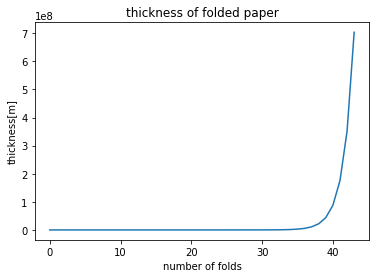

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

THICKNESS = 0.00008
folded_thickness = []
temp_thickness = THICKNESS
folded_thickness.append(temp_thickness)
for count in range(1, 44):
    folded_thickness.append(temp_thickness * 2)
    temp_thickness = folded_thickness[count]

plt.title("thickness of folded paper")
plt.xlabel("number of folds")
plt.ylabel("thickness[m]")
plt.plot(folded_thickness)
plt.show()

- 考察\
雛形のグラフでは、\
35回あたりまでの紙を折り曲げた厚みは、横ばいに推移しているグラフに観える。\
指数関数の値は急激に増加する性質があり、36回あたり以降から急激に増加する。\
問題7のグラフのカスタマイズにて可視化を促進する。

## 【問題7】グラフのカスタマイズ

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
THICKNESS = 0.00008
folded_thickness = []
temp_thickness = THICKNESS
folded_thickness.append(temp_thickness)
for count in range(1, 44):
    folded_thickness.append(temp_thickness * 2)
    temp_thickness = folded_thickness[count]

＜1種類目＞
- 線の色を青と赤以外にする。
- 線を太くする。

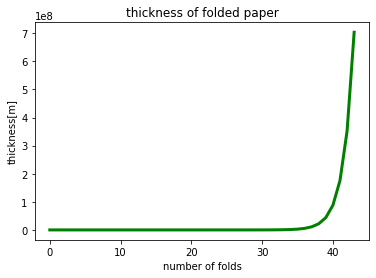

In [26]:
plt.title("thickness of folded paper")
plt.xlabel("number of folds")
plt.ylabel("thickness[m]")
plt.plot(folded_thickness, color='green', linewidth=3) # color, linewidth を指定
plt.show()

＜2種類目＞
- 線を点線にする。
- 値のフォントサイズを変更する。

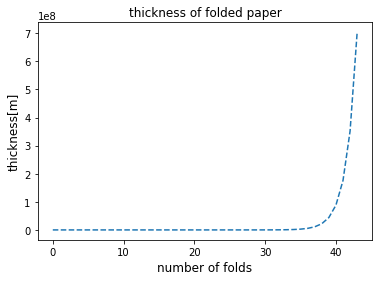

In [25]:
plt.title("thickness of folded paper", fontsize='large') # fontsize を指定
plt.xlabel("number of folds", fontsize='large') # fontsize を指定
plt.ylabel("thickness[m]", fontsize='large') # fontsize を指定
plt.plot(folded_thickness, linestyle='dashed') # linestyle を指定
plt.show()

＜3種類目＞
-  Artist layerを使用

In [68]:
import numpy as np
import matplotlib as mpl

In [69]:
print ('Matplotlib version: ', mpl.__version__)

Matplotlib version:  3.1.1


In [84]:
THICKNESS = 0.00000008 #定数をkmに設定
folded_thickness = []
temp_thickness = THICKNESS
folded_thickness.append(temp_thickness)
for count in range(1, 44):
    folded_thickness.append(temp_thickness * 2)
    temp_thickness = folded_thickness[count]

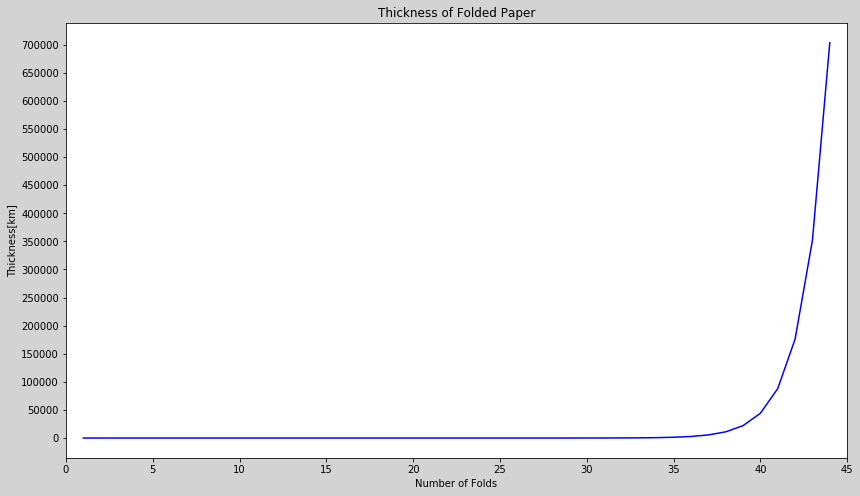

In [86]:
fig = plt.figure(figsize=(14,8),facecolor='lightgrey')
ax = fig.add_subplot(111, xlim=(0,45)) #1行１列1件のデータ  参考 fig.subplots_adjust(top=0.8)

ax.set_title('Thickness of Folded Paper')
ax.set_xlabel('Number of Folds')
ax.set_ylabel('Thickness[km]')
ax.set_yticks(np.arange(min(folded_thickness), max(folded_thickness), 50000))

xlabel = list(range(1,45))
ylabel = folded_thickness
line, = ax.plot(xlabel, ylabel, color='blue')

plt.show()